> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`,
* `title` - `str`,
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`.

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [1]:
#### Escreva sua resposta aqui
from dataclasses import dataclass, field
from enum import Enum
from typing import Any

# 1. Enum para os níveis
class BiteLevel(Enum):
    Beginner = "Beginner"
    Intermediate = "Intermediate"
    Advanced = "Advanced"

# 2. Dataclass Bite
@dataclass(order=True)
class Bite:
    number: int
    title: str
    level: BiteLevel = field(default=BiteLevel.Beginner, compare=False)

    def __post_init__(self):
        # Conversão de strings para enum, se necessário
        if isinstance(self.level, str):
            self.level = BiteLevel[self.level]

    def __str__(self):
        return f'{self.number} - {self.title} ({self.level.value})'


In [2]:
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

bites.sort()

for b in bites:
    print(b)


1 - Some n valores (Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`).
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [3]:
#### Escreva sua resposta aqui
from pydantic import BaseModel, validator
from typing import Optional, List
from datetime import date


class WeatherObservation(BaseModel):
    date: date
    temperature: float
    isCelsius: Optional[bool] = True  # True por padrão
    airQualityIndex: Optional[int] = None
    sunriseTime: Optional[str] = None
    sunsetTime: Optional[str] = None

    # Validador para aceitar strings como números
    @validator("temperature", pre=True)
    def parse_temperature(cls, value):
        return float(value)

    @validator("isCelsius", pre=True)
    def parse_is_celsius(cls, value):
        if isinstance(value, str):
            if value.lower() in ["false", "no", "0"]:
                return False
            elif value.lower() in ["true", "yes", "1"]:
                return True
        return bool(value)

    @validator("airQualityIndex", pre=True)
    def parse_air_quality_index(cls, value):
        if value is not None:
            return int(value)

    def get_temp_celsius(self) -> float:
        """Converte temperatura para Celsius se estiver em Fahrenheit."""
        return self.temperature if self.isCelsius else (self.temperature - 32) * 5 / 9


<ipython-input-3-f29b88a9ba18>:16: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator("temperature", pre=True)
<ipython-input-3-f29b88a9ba18>:20: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator("isCelsius", pre=True)
<ipython-input-3-f29b88a9ba18>:29: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the m

In [4]:
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

observations: List[WeatherObservation] = []

for sample in data_samples:
    try:
        obs = WeatherObservation(**sample)
        observations.append(obs)
    except Exception as e:
        print(f"Erro ao processar entrada: {sample} → {e}")

# Média das temperaturas convertidas para Celsius
temperaturas_celsius = [obs.get_temp_celsius() for obs in observations]
media = sum(temperaturas_celsius) / len(temperaturas_celsius)

print(f"Temperatura média em Celsius: {media:.2f}°C")


Temperatura média em Celsius: 31.86°C


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ...
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
```

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [6]:
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
#print(json.dumps(response, indent=2))

In [7]:
#### Escreva aqui seus modelos Pydantic
import requests, json
from pydantic import BaseModel
from typing import List
from datetime import datetime

# Definindo os modelos Pydantic
class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[datetime]
    temperature_2m: List[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

# Fazendo a requisição
url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {
    'latitude': lat,
    'longitude': long,
    'elevation': 2,
    'hourly': 'temperature_2m',
    'forecast_days': 15,
    'timezone': 'GMT'
}
response = requests.get(url, params=params).json()

# Criando o objeto Pydantic
dados = OpenMeteo(**response)

# Exemplo de uso: calcular a temperatura média
temperaturas = dados.hourly.temperature_2m
media = sum(temperaturas) / len(temperaturas)

print(f"Temperatura média nos próximos 15 dias em Itabira: {media:.2f}°C")


Temperatura média nos próximos 15 dias em Itabira: 24.97°C


#### Q4.

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

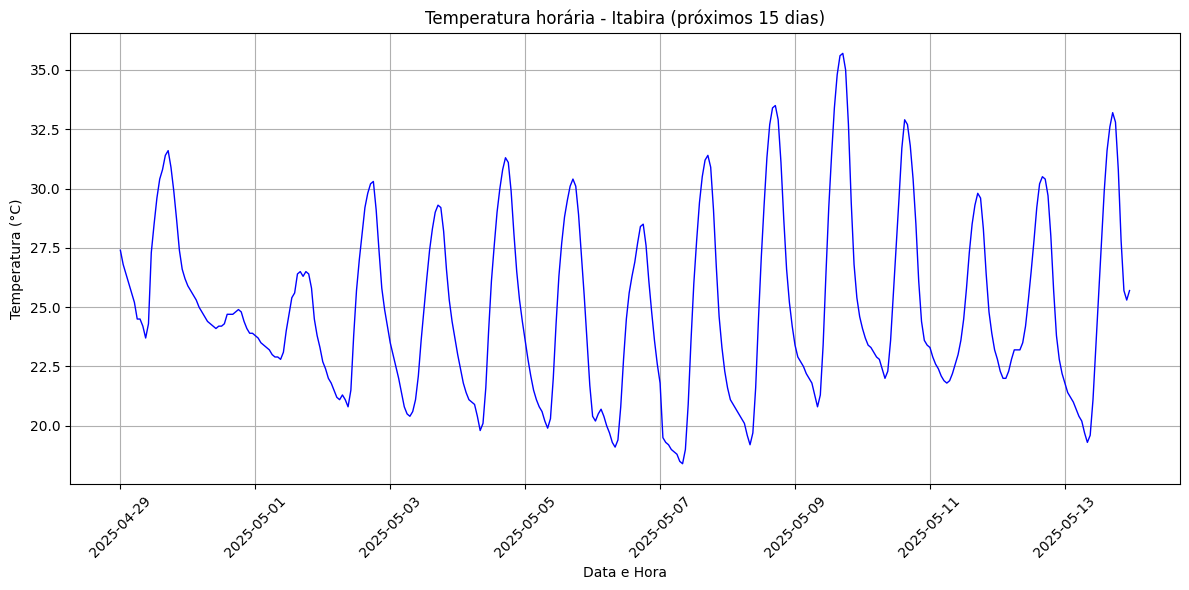

In [8]:
#### Escreva aqui a sua resposta
import requests
from pydantic import BaseModel
from typing import List
from datetime import datetime
import matplotlib.pyplot as plt

# Modelos Pydantic
class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[datetime]
    temperature_2m: List[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

# Requisição dos dados
url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {
    'latitude': lat,
    'longitude': long,
    'elevation': 2,
    'hourly': 'temperature_2m',
    'forecast_days': 15,
    'timezone': 'GMT'
}
response = requests.get(url, params=params).json()
dados = OpenMeteo(**response)

# Preparação dos dados
tempos = dados.hourly.time
temperaturas = dados.hourly.temperature_2m

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(tempos, temperaturas, color='blue', linewidth=1)
plt.title("Temperatura horária - Itabira (próximos 15 dias)")
plt.xlabel("Data e Hora")
plt.ylabel("Temperatura (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


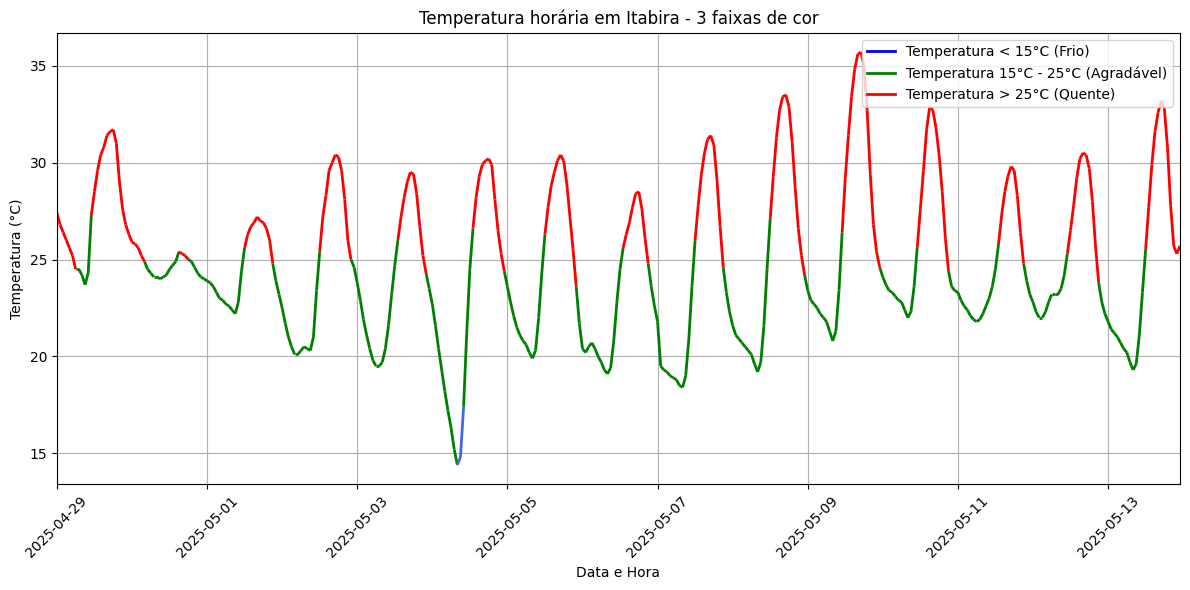

In [20]:
import requests
from pydantic import BaseModel
from typing import List
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
from matplotlib.dates import date2num

# Modelos Pydantic
class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[datetime]
    temperature_2m: List[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

# Requisição à API
url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {
    'latitude': lat,
    'longitude': long,
    'elevation': 2,
    'hourly': 'temperature_2m',
    'forecast_days': 15,
    'timezone': 'GMT'
}
response = requests.get(url, params=params).json()
dados = OpenMeteo(**response)

# Dados
tempos = dados.hourly.time
temperaturas = dados.hourly.temperature_2m

# Convertersão de datas para formato numérico do matplotlib
tempos_num = np.array([date2num(t) for t in tempos])
temperaturas = np.array(temperaturas)

# Segmentos de linha
points = np.array([tempos_num, temperaturas]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Definição de cores com base nas faixas de temperatura
cores = []
for t in temperaturas[:-1]:
    if t < 15:
        cores.append('royalblue')
    elif t <= 25:
        cores.append('green')
    else:
        cores.append('red')

# Coleção de segmentos coloridos
lc = LineCollection(segments, colors=cores, linewidth=2)

fig, ax = plt.subplots(figsize=(12, 6))
ax.add_collection(lc)

# Configuração do gráfico
ax.set_xlim(tempos_num.min(), tempos_num.max())
ax.set_ylim(temperaturas.min() - 1, temperaturas.max() + 1)
ax.set_title("Temperatura horária em Itabira - 3 faixas de cor")
ax.set_xlabel("Data e Hora")
ax.set_ylabel("Temperatura (°C)")

ax.xaxis_date()
plt.xticks(rotation=45)

# Legenda
handles = [
    plt.Line2D([0], [0], color='blue', lw=2, label="Temperatura < 15°C (Frio)"),
    plt.Line2D([0], [0], color='green', lw=2, label="Temperatura 15°C - 25°C (Agradável)"),
    plt.Line2D([0], [0], color='red', lw=2, label="Temperatura > 25°C (Quente)")
]
ax.legend(handles=handles)
plt.grid(True)
plt.tight_layout()
plt.savefig('temperatura_itabira.png')

# Mostrar o gráfico
plt.show()
